En el proceso de inspección actual un componente de la línea de producción se selecciona al azar cada 15 minutos. Cada componente es inspeccionado y los defectos clasificados en Mayores y Menores, el costo de cada inspección es de U$S1,5. Los componentes con defectos Mayores, son los que afectan al rendimiento de los componentes y deben ser solucionados inmediatamente. Afortunadamente, los defectos Mayores son encontrados esporádicamente, porque generalmente son detectados y corregidos tempranamente en el proceso de producción. Los defectos Menores, tales como pequeñas imperfecciones en la forma, son aquellos que afectan la apariencia de un componente, pero no su funcionalidad. Monitorear los defectos Menores y garantizar que la tasa no aumente es de particular preocupación para la gerencia de producción y calidad.

**Variables del Dataset:**
- **ID**: Identificador único del componente inspeccionado.
- **Hora**: Hora en que se realizó la inspección.
- **Día (1-10)**: Día de la inspección (del 1 al 10).

**Consigna**: Explore la eficiencia del proceso de inspección actual y acciones que recomiende a la gerencia para reducir los costos y la ocurrencia de los defectos Menores.

Solo deben usarse las siguientes herramientas si creen que son necesarias para el análisis:
* LISTA DE VERIFICACIÓN
* HISTOGRAMA
* DIAGRAMA DE PARETO
* DIAGRAMA DE FLUJO
* DIAGRAMA DE CAUSA-EFECTO
* DIAGRAMA DE CONTROL
* DIAGRAMA DE DISPERSIÓN

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
electricErrorsPath = '../data/raw/electricErrors.csv'
df_electricErrors = pd.read_csv(electricErrorsPath, sep=',')

In [13]:
df_electricErrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      32 non-null     int64 
 1   Hora    32 non-null     object
 2   Dia 1   32 non-null     int64 
 3   Dia 2   32 non-null     int64 
 4   Dia 3   32 non-null     int64 
 5   Dia 4   32 non-null     int64 
 6   Dia 5   32 non-null     int64 
 7   Dia 6   32 non-null     int64 
 8   Dia 7   32 non-null     int64 
 9   Dia 8   32 non-null     int64 
 10  Dia 9   32 non-null     int64 
 11  Dia 10  32 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 3.1+ KB


In [14]:
df_electricErrors.describe()

,id,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Dia 8,Dia 9,Dia 10
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,10.343750,10.156250,10.281250,10.218750,10.281250,10.156250,10.250000,10.437500,10.250000,10.875000
std,9.380832,2.535037,3.283481,3.621035,3.507912,3.333451,3.091188,3.445427,3.036737,3.100468,3.024097
min,1.000000,4.000000,1.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000
25%,8.750000,9.000000,7.000000,7.750000,7.750000,8.000000,8.500000,8.000000,9.000000,8.000000,9.000000
50%,16.500000,10.500000,11.000000,10.500000,11.000000,10.500000,10.500000,10.000000,10.500000,11.000000,10.000000
75%,24.250000,12.000000,12.000000,13.000000,12.250000,13.000000,12.000000,12.250000,12.000000,12.000000,13.000000
max,32.000000,15.000000,17.000000,17.000000,16.000000,17.000000,17.000000,16.000000,17.000000,16.000000,18.000000


In [15]:
# Visualizar las primeras filas del dataset
df_electricErrors.head()

,id,Hora,Dia 1,Dia 2,Dia 3,Dia 4,Dia 5,Dia 6,Dia 7,Dia 8,Dia 9,Dia 10
0,1,08:15,12,17,7,11,7,13,10,10,11,9
1,2,08:30,8,12,11,11,8,9,8,11,12,18
2,3,08:45,9,7,9,8,7,14,15,11,10,17
3,4,09:00,11,11,16,12,11,10,3,11,12,16
4,5,09:15,9,7,8,12,7,7,8,14,14,10


## 1. EXPLORACIÓN INICIAL DE DATOS

In [16]:
# Transformar los datos de formato ancho a formato largo para facilitar el análisis
df_long = df_electricErrors.melt(id_vars=['id', 'Hora'], 
                                  var_name='Dia', 
                                  value_name='Defectos_Menores')

# Extraer el número del día
df_long['Dia'] = df_long['Dia'].str.extract('(\d+)').astype(int)

print("Datos transformados:")
print(df_long.head(10))
print(f"\nTotal de observaciones: {len(df_long)}")

Datos transformados:
   id   Hora  Dia  Defectos_Menores
0   1  08:15    1                12
1   2  08:30    1                 8
2   3  08:45    1                 9
3   4  09:00    1                11
4   5  09:15    1                 9
5   6  09:30    1                10
6   7  09:45    1                12
7   8  10:00    1                 9
8   9  10:15    1                12
9  10  10:30    1                 4

Total de observaciones: 320


In [17]:
# Estadísticas descriptivas de defectos menores
print("Estadísticas de Defectos Menores:")
print(f"Media: {df_long['Defectos_Menores'].mean():.2f}")
print(f"Mediana: {df_long['Defectos_Menores'].median():.2f}")
print(f"Desviación estándar: {df_long['Defectos_Menores'].std():.2f}")
print(f"Mínimo: {df_long['Defectos_Menores'].min()}")
print(f"Máximo: {df_long['Defectos_Menores'].max()}")
print(f"\nTotal de defectos menores en 10 días: {df_long['Defectos_Menores'].sum()}")

Estadísticas de Defectos Menores:
Media: 10.32
Mediana: 11.00
Desviación estándar: 3.17
Mínimo: 1
Máximo: 18

Total de defectos menores en 10 días: 3304


## 2. HERRAMIENTA: HISTOGRAMA
**Objetivo:** Analizar la distribución de los defectos menores para entender la variabilidad del proceso.

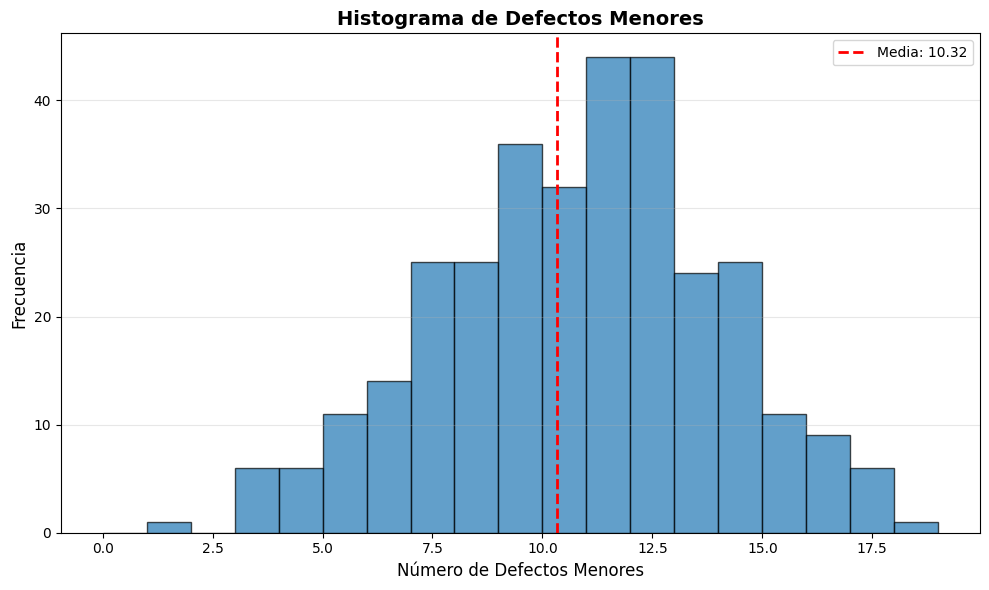

In [18]:
# Histograma de defectos menores
plt.figure(figsize=(10, 6))
plt.hist(df_long['Defectos_Menores'], bins=range(0, 20), edgecolor='black', alpha=0.7)
plt.axvline(df_long['Defectos_Menores'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df_long["Defectos_Menores"].mean():.2f}')
plt.xlabel('Número de Defectos Menores', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma de Defectos Menores', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 2. HERRAMIENTA: DIAGRAMA DE DISPERSIÓN
**Objetivo:** Analizar si existe relación entre el momento del día (hora) y la cantidad de defectos.

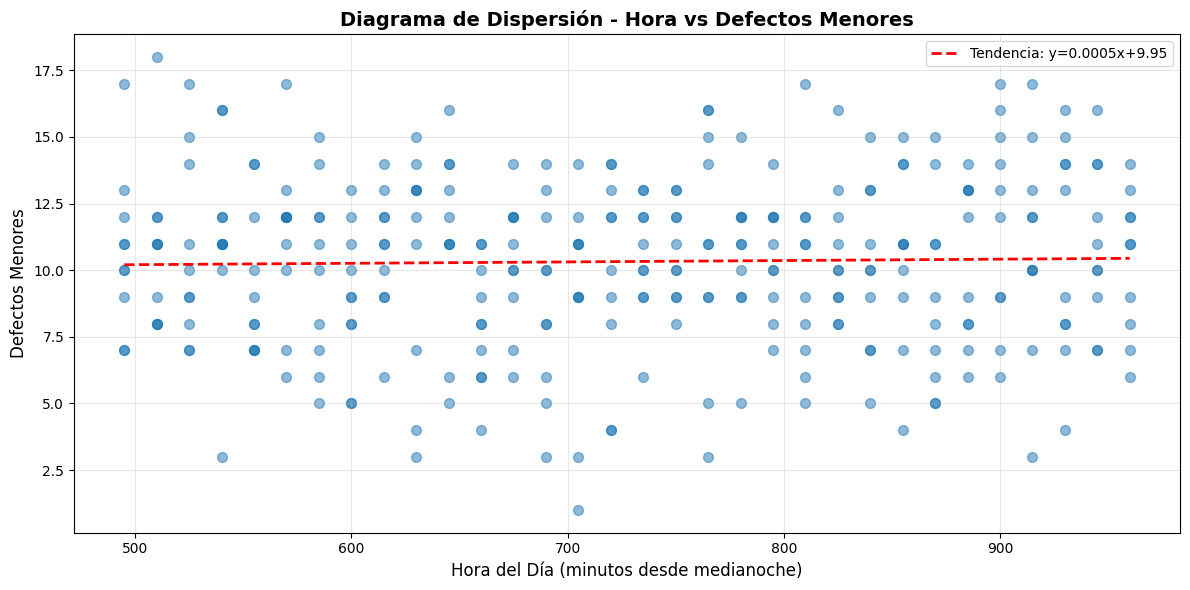


Coeficiente de correlación: 0.0227
→ Correlación débil o nula entre hora del día y defectos.


In [19]:
# Convertir hora a valor numérico (minutos desde inicio del día laboral)
def hora_a_minutos(hora_str):
    h, m = map(int, hora_str.split(':'))
    return h * 60 + m

df_long['Minutos'] = df_long['Hora'].apply(hora_a_minutos)

# Diagrama de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(df_long['Minutos'], df_long['Defectos_Menores'], alpha=0.5, s=50)

# Línea de tendencia
z = np.polyfit(df_long['Minutos'], df_long['Defectos_Menores'], 1)
p = np.poly1d(z)
plt.plot(df_long['Minutos'].sort_values(), p(df_long['Minutos'].sort_values()), 
         "r--", linewidth=2, label=f'Tendencia: y={z[0]:.4f}x+{z[1]:.2f}')

plt.xlabel('Hora del Día (minutos desde medianoche)', fontsize=12)
plt.ylabel('Defectos Menores', fontsize=12)
plt.title('Diagrama de Dispersión - Hora vs Defectos Menores', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Correlación
correlacion = df_long['Minutos'].corr(df_long['Defectos_Menores'])
print(f"\nCoeficiente de correlación: {correlacion:.4f}")
if abs(correlacion) < 0.3:
    print("→ Correlación débil o nula entre hora del día y defectos.")

## 3. HERRAMIENTA: LISTA DE VERIFICACIÓN
**Objetivo:** Visualizar patrones de defectos por hora y día.

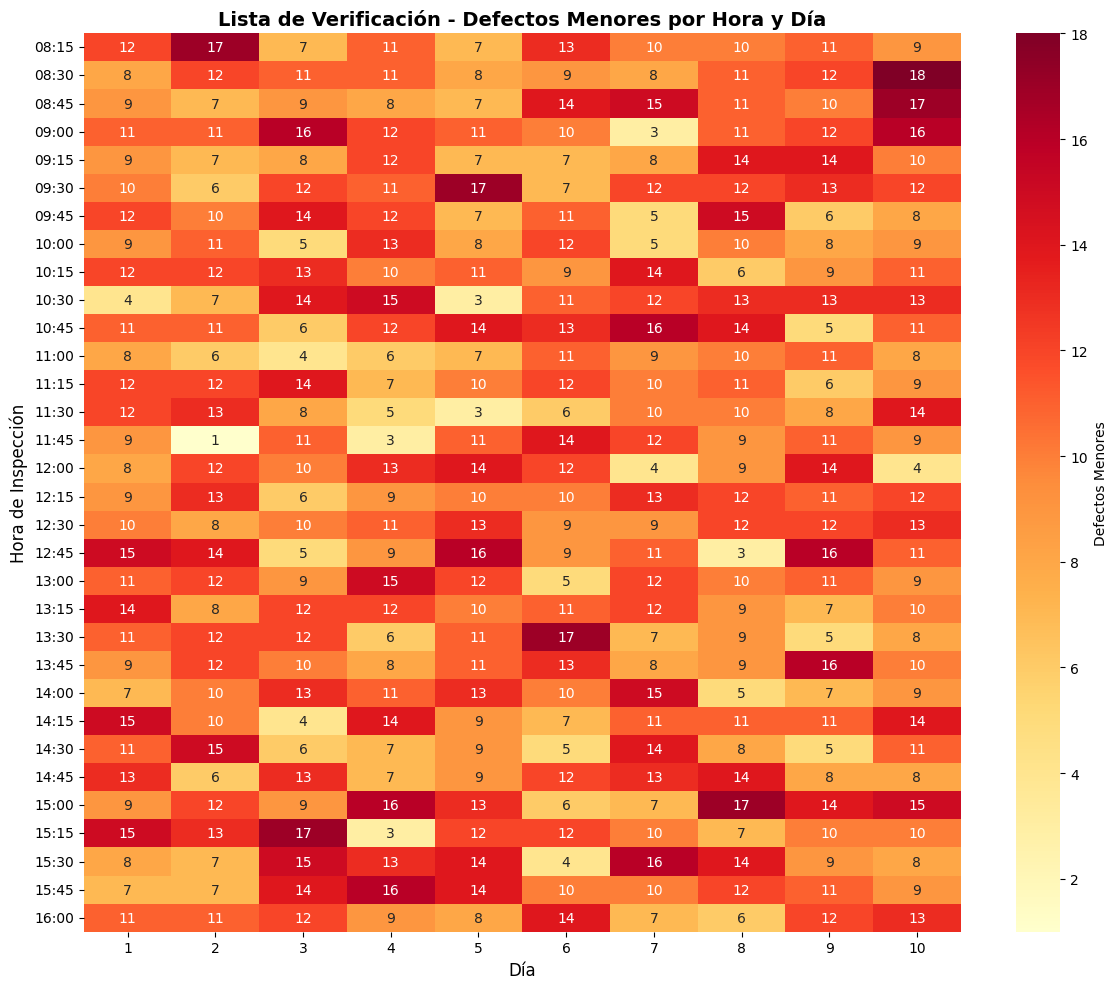


RESUMEN DE LISTA DE VERIFICACIÓN:
Total de inspecciones realizadas: 320
Total de defectos menores detectados: 3304
Promedio de defectos por inspección: 10.32

Hora con MÁS defectos: 15:00 (118 defectos)
Hora con MENOS defectos: 11:00 (80 defectos)

Día con MÁS defectos: Día 10 (348 defectos)
Día con MENOS defectos: Día 2 (325 defectos)


In [20]:
# Crear matriz de calor (Lista de verificación visual)
pivot_table = df_long.pivot_table(values='Defectos_Menores', 
                                   index='Hora', 
                                   columns='Dia', 
                                   aggfunc='sum')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Defectos Menores'})
plt.title('Lista de Verificación - Defectos Menores por Hora y Día', fontsize=14, fontweight='bold')
plt.xlabel('Día', fontsize=12)
plt.ylabel('Hora de Inspección', fontsize=12)
plt.tight_layout()
plt.show()

# Resumen estadístico
defectos_por_hora = df_long.groupby('Hora')['Defectos_Menores'].sum()
defectos_por_dia = df_long.groupby('Dia')['Defectos_Menores'].sum()

print("\nRESUMEN DE LISTA DE VERIFICACIÓN:")
print("="*60)
print(f"Total de inspecciones realizadas: {len(df_long)}")
print(f"Total de defectos menores detectados: {df_long['Defectos_Menores'].sum()}")
print(f"Promedio de defectos por inspección: {df_long['Defectos_Menores'].mean():.2f}")
print(f"\nHora con MÁS defectos: {defectos_por_hora.idxmax()} ({defectos_por_hora.max()} defectos)")
print(f"Hora con MENOS defectos: {defectos_por_hora.idxmin()} ({defectos_por_hora.min()} defectos)")
print(f"\nDía con MÁS defectos: Día {defectos_por_dia.idxmax()} ({defectos_por_dia.max()} defectos)")
print(f"Día con MENOS defectos: Día {defectos_por_dia.idxmin()} ({defectos_por_dia.min()} defectos)")

## 4. ANÁLISIS DE COSTOS Y PROPUESTA DE OPTIMIZACIÓN

In [21]:
# Costos del proceso ACTUAL (inspección cada 15 minutos)
costo_por_inspeccion = 1.5  # U$S
inspecciones_por_dia_actual = 32  # Una cada 15 minutos durante 8 horas
dias_periodo = 10

total_inspecciones_actual = inspecciones_por_dia_actual * dias_periodo
costo_total_actual = total_inspecciones_actual * costo_por_inspeccion

print("PROCESO ACTUAL - Inspección cada 15 minutos")
print("="*60)
print(f"Inspecciones por día: {inspecciones_por_dia_actual}")
print(f"Total de inspecciones en {dias_periodo} días: {total_inspecciones_actual}")
print(f"Costo total: U$S {costo_total_actual:.2f}")
print(f"Costo diario: U$S {costo_total_actual/dias_periodo:.2f}")
print(f"Costo mensual estimado (22 días): U$S {(costo_total_actual/dias_periodo)*22:.2f}")
print(f"Costo anual estimado (250 días): U$S {(costo_total_actual/dias_periodo)*250:.2f}")

print("\n" + "="*60)
print("PROPUESTA - Inspección cada 30 minutos")
print("="*60)

# Costos con PROPUESTA (inspección cada 30 minutos)
inspecciones_por_dia_propuesta = 16  # Una cada 30 minutos durante 8 horas
total_inspecciones_propuesta = inspecciones_por_dia_propuesta * dias_periodo
costo_total_propuesta = total_inspecciones_propuesta * costo_por_inspeccion

print(f"Inspecciones por día: {inspecciones_por_dia_propuesta}")
print(f"Total de inspecciones en {dias_periodo} días: {total_inspecciones_propuesta}")
print(f"Costo total: U$S {costo_total_propuesta:.2f}")
print(f"Costo diario: U$S {costo_total_propuesta/dias_periodo:.2f}")
print(f"Costo mensual estimado (22 días): U$S {(costo_total_propuesta/dias_periodo)*22:.2f}")
print(f"Costo anual estimado (250 días): U$S {(costo_total_propuesta/dias_periodo)*250:.2f}")

print("\n" + "="*60)
print("AHORRO ESTIMADO")
print("="*60)

ahorro_diario = (costo_total_actual - costo_total_propuesta) / dias_periodo
ahorro_mensual = ahorro_diario * 22
ahorro_anual = ahorro_diario * 250
porcentaje_ahorro = ((costo_total_actual - costo_total_propuesta) / costo_total_actual) * 100

print(f"Ahorro diario: U$S {ahorro_diario:.2f}")
print(f"Ahorro mensual: U$S {ahorro_mensual:.2f}")
print(f"Ahorro anual: U$S {ahorro_anual:.2f}")
print(f"Porcentaje de reducción de costos: {porcentaje_ahorro:.1f}%")

PROCESO ACTUAL - Inspección cada 15 minutos
Inspecciones por día: 32
Total de inspecciones en 10 días: 320
Costo total: U$S 480.00
Costo diario: U$S 48.00
Costo mensual estimado (22 días): U$S 1056.00
Costo anual estimado (250 días): U$S 12000.00

PROPUESTA - Inspección cada 30 minutos
Inspecciones por día: 16
Total de inspecciones en 10 días: 160
Costo total: U$S 240.00
Costo diario: U$S 24.00
Costo mensual estimado (22 días): U$S 528.00
Costo anual estimado (250 días): U$S 6000.00

AHORRO ESTIMADO
Ahorro diario: U$S 24.00
Ahorro mensual: U$S 528.00
Ahorro anual: U$S 6000.00
Porcentaje de reducción de costos: 50.0%


### Análisis de diferentes escenarios: Trade-off Ahorro vs. Riesgo

COMPARACIÓN DE ESCENARIOS DE INSPECCIÓN
      Intervalo  Insp/día  Insp/año  Costo_anual_USD  Ahorro_vs_actual_USD  Ahorro_%
15 min (ACTUAL)        32      8000          12000.0                   0.0       0.0
         30 min        16      4000           6000.0                6000.0      50.0
         1 hora         8      2000           3000.0                9000.0      75.0
        2 horas         4      1000           1500.0               10500.0      87.5
        4 horas         2       500            750.0               11250.0      93.8
      1 vez/día         1       250            375.0               11625.0      96.9



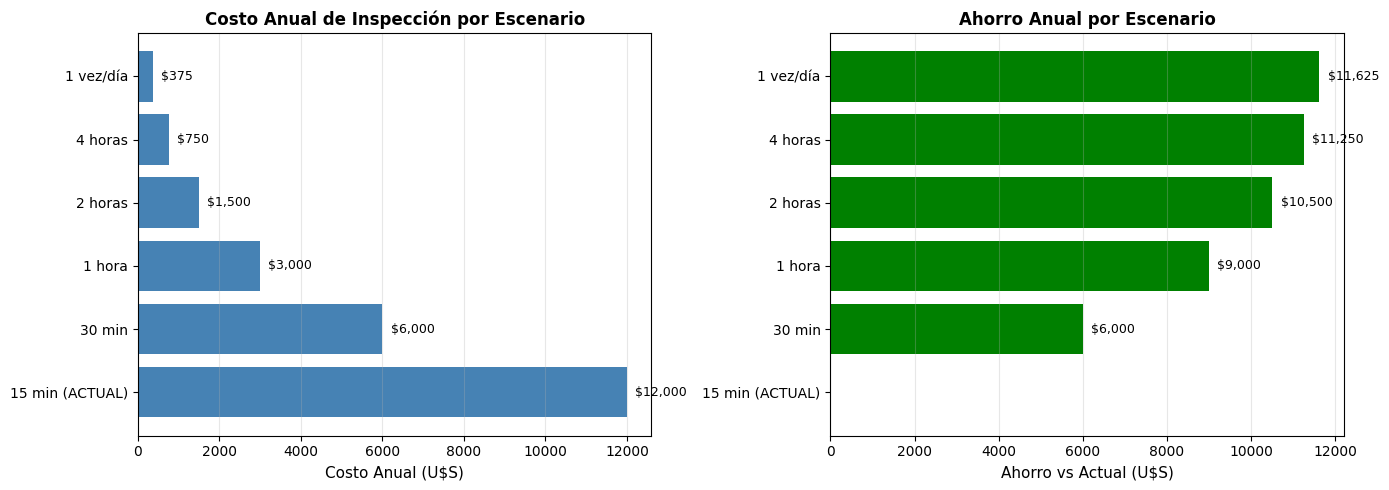

In [22]:
# Análisis comparativo de diferentes frecuencias de inspección
import pandas as pd

escenarios = [
    {'Intervalo': '15 min (ACTUAL)', 'Insp/día': 32, 'Insp/año': 8000},
    {'Intervalo': '30 min', 'Insp/día': 16, 'Insp/año': 4000},
    {'Intervalo': '1 hora', 'Insp/día': 8, 'Insp/año': 2000},
    {'Intervalo': '2 horas', 'Insp/día': 4, 'Insp/año': 1000},
    {'Intervalo': '4 horas', 'Insp/día': 2, 'Insp/año': 500},
    {'Intervalo': '1 vez/día', 'Insp/día': 1, 'Insp/año': 250},
]

df_escenarios = pd.DataFrame(escenarios)
df_escenarios['Costo_anual_USD'] = df_escenarios['Insp/año'] * 1.5
df_escenarios['Ahorro_vs_actual_USD'] = df_escenarios['Costo_anual_USD'].iloc[0] - df_escenarios['Costo_anual_USD']
df_escenarios['Ahorro_%'] = (df_escenarios['Ahorro_vs_actual_USD'] / df_escenarios['Costo_anual_USD'].iloc[0] * 100).round(1)

print("COMPARACIÓN DE ESCENARIOS DE INSPECCIÓN")
print("="*80)
print(df_escenarios.to_string(index=False))
print("\n" + "="*80)

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Costo anual por escenario
ax1.barh(df_escenarios['Intervalo'], df_escenarios['Costo_anual_USD'], color='steelblue')
ax1.set_xlabel('Costo Anual (U$S)', fontsize=11)
ax1.set_title('Costo Anual de Inspección por Escenario', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(df_escenarios['Costo_anual_USD']):
    ax1.text(v + 200, i, f'${v:,.0f}', va='center', fontsize=9)

# Gráfico 2: Ahorro potencial
colores = ['red'] + ['green'] * (len(df_escenarios) - 1)
ax2.barh(df_escenarios['Intervalo'], df_escenarios['Ahorro_vs_actual_USD'], color=colores)
ax2.set_xlabel('Ahorro vs Actual (U$S)', fontsize=11)
ax2.set_title('Ahorro Anual por Escenario', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(df_escenarios['Ahorro_vs_actual_USD']):
    if v > 0:
        ax2.text(v + 200, i, f'${v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### ¿Por qué NO extender más allá de 30 minutos? Análisis de riesgos y limitaciones

In [ ]:
# Análisis de riesgos al extender intervalos
print("FACTORES QUE LIMITAN LA EXTENSIÓN DEL INTERVALO DE INSPECCIÓN")
print("="*80)

# 1. Tiempo de detección de problemas
print("\n1. TIEMPO DE DETECCIÓN DE DEFECTOS MAYORES:")
print("-" * 80)
intervalos = [15, 30, 60, 120, 240, 480]
nombres = ['15 min', '30 min', '1 hora', '2 horas', '4 horas', '8 horas (1/día)']

for i, (intervalo, nombre) in enumerate(zip(intervalos, nombres)):
    # Tiempo promedio de detección = intervalo/2 (en promedio, el defecto ocurre a mitad del intervalo)
    tiempo_prom_deteccion = intervalo / 2
    # En el peor caso, se detecta al final del intervalo
    tiempo_max_deteccion = intervalo
    
    # Componentes afectados (asumiendo 1 componente cada 2 minutos de producción continua)
    componentes_riesgo_prom = tiempo_prom_deteccion / 2
    componentes_riesgo_max = tiempo_max_deteccion / 2
    
    print(f"{nombre:15} → Detección promedio: {tiempo_prom_deteccion:5.1f} min | "
          f"Peor caso: {tiempo_max_deteccion:5.1f} min | "
          f"Componentes en riesgo: {componentes_riesgo_prom:.0f}-{componentes_riesgo_max:.0f}")

print("\n2. PÉRDIDA DE CAPACIDAD DE RESPUESTA:")
print("-" * 80)
print("Si aparece un DEFECTO MAYOR (afecta rendimiento):")
print("  • 15 min: Se detecta en máx 15 min → ~7 componentes afectados")
print("  • 30 min: Se detecta en máx 30 min → ~15 componentes afectados  ✓ ACEPTABLE")
print("  • 1 hora: Se detecta en máx 60 min → ~30 componentes afectados  ⚠️ RIESGOSO")
print("  • 2 horas: Se detecta en máx 120 min → ~60 componentes afectados  ❌ INACEPTABLE")
print("  • 1/día: Se detecta en máx 8 horas → ~240 componentes afectados  ❌ CATASTRÓFICO")

print("\n3. CAPACIDAD DE MONITOREO DE TENDENCIAS:")
print("-" * 80)
puntos_dia = [32, 16, 8, 4, 2, 1]
for nombre, puntos in zip(nombres, puntos_dia):
    print(f"{nombre:15} → {puntos:2} puntos/día | {puntos*10:3} puntos/10días ", end="")
    if puntos >= 16:
        print("✓ Suficientes datos para análisis estadístico")
    elif puntos >= 8:
        print("⚠️ Datos limitados, dificulta detección de tendencias")
    else:
        print("❌ Datos insuficientes para control estadístico confiable")

print("\n4. MUESTRA ESTADÍSTICA REPRESENTATIVA:")
print("-" * 80)
print(f"Para control estadístico confiable se recomienda n ≥ 100 observaciones")
dias_necesarios = [100/p for p in puntos_dia]
for nombre, dias in zip(nombres, dias_necesarios):
    print(f"{nombre:15} → {dias:5.1f} días para 100 observaciones", end="")
    if dias <= 7:
        print("  ✓ Análisis semanal viable")
    elif dias <= 14:
        print("  ⚠️ Requiere 2 semanas")
    else:
        print("  ❌ Demasiado tiempo para feedback")

print("\n" + "="*80)
print("\n⚖️  TRADE-OFF AHORRO vs. RIESGO:")
print("-" * 80)
print("Cada escenario representa un balance entre reducción de costos y exposición al riesgo:")
print()
print("  15 min → Riesgo MÍN (7 comp.)  | Costo MÁX ($12,000) → Actual")
print("  30 min → Riesgo BAJO (15 comp.) | Costo MEDIO ($6,000) → ✓ ÓPTIMO")
print("  1 hora → Riesgo MEDIO (30 comp.) | Costo BAJO ($3,000) → ⚠️  Riesgoso")
print("  2+ hrs → Riesgo ALTO (60+ comp.) | Costo MÍN ($1,500-) → ❌ Inaceptable")
print()
print("CONCLUSIÓN: 30 minutos captura el 50% del ahorro máximo posible")
print("            con solo duplicar el riesgo vs. situación actual.")
print("="*80)

FACTORES QUE LIMITAN LA EXTENSIÓN DEL INTERVALO DE INSPECCIÓN

1. TIEMPO DE DETECCIÓN DE DEFECTOS MAYORES:
--------------------------------------------------------------------------------
15 min          → Detección promedio:   7.5 min | Peor caso:  15.0 min | Componentes en riesgo: 4-8
30 min          → Detección promedio:  15.0 min | Peor caso:  30.0 min | Componentes en riesgo: 8-15
1 hora          → Detección promedio:  30.0 min | Peor caso:  60.0 min | Componentes en riesgo: 15-30
2 horas         → Detección promedio:  60.0 min | Peor caso: 120.0 min | Componentes en riesgo: 30-60
4 horas         → Detección promedio: 120.0 min | Peor caso: 240.0 min | Componentes en riesgo: 60-120
8 horas (1/día) → Detección promedio: 240.0 min | Peor caso: 480.0 min | Componentes en riesgo: 120-240

2. PÉRDIDA DE CAPACIDAD DE RESPUESTA:
--------------------------------------------------------------------------------
Si aparece un DEFECTO MAYOR (afecta rendimiento):
  • 15 min: Se detecta en máx 

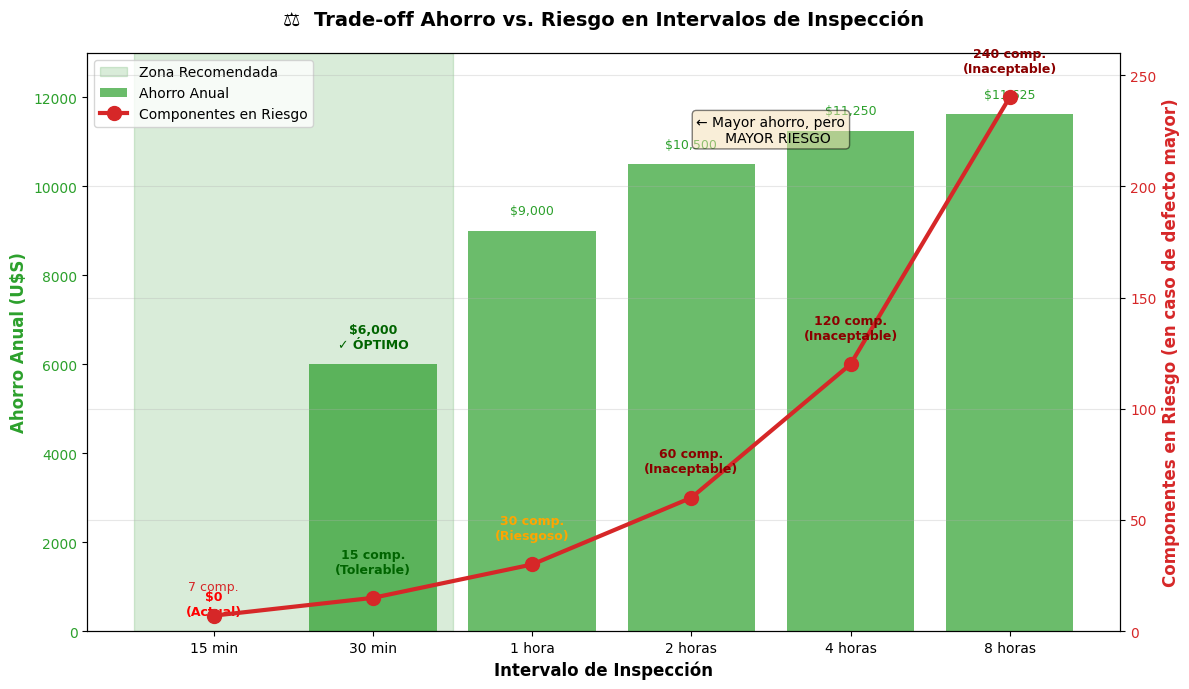


INTERPRETACIÓN DEL GRÁFICO:
📊 BARRAS VERDES (Ahorro): Aumentan con intervalos más largos
📈 LÍNEA ROJA (Riesgo): Se dispara exponencialmente con intervalos largos

🎯 PUNTO ÓPTIMO (30 min):
   • Captura 50% del ahorro máximo posible ($6,000 de $11,625)
   • Duplica el riesgo vs. actual (15 vs. 7 componentes)
   • Balance aceptable entre ahorro y exposición al riesgo

⚠️  Más allá de 30 min: El riesgo crece más rápido que el ahorro


In [24]:
# Gráfico del Trade-off Ahorro vs. Riesgo
fig, ax1 = plt.subplots(figsize=(12, 7))

# Datos para el gráfico
intervalos_min = [15, 30, 60, 120, 240, 480]
nombres_cortos = ['15 min', '30 min', '1 hora', '2 horas', '4 horas', '8 horas']
ahorros = [0, 6000, 9000, 10500, 11250, 11625]
componentes_riesgo = [7, 15, 30, 60, 120, 240]

# Eje 1: Ahorro (barras)
color_ahorro = 'tab:green'
ax1.set_xlabel('Intervalo de Inspección', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ahorro Anual (U$S)', color=color_ahorro, fontsize=12, fontweight='bold')
bars = ax1.bar(nombres_cortos, ahorros, alpha=0.7, color=color_ahorro, label='Ahorro Anual')
ax1.tick_params(axis='y', labelcolor=color_ahorro)
ax1.set_ylim([0, 13000])

# Agregar valores sobre las barras
for i, (bar, valor) in enumerate(zip(bars, ahorros)):
    height = bar.get_height()
    if i == 0:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'${valor:,}\n(Actual)',
                ha='center', va='bottom', fontsize=9, color='red', fontweight='bold')
    elif i == 1:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'${valor:,}\n✓ ÓPTIMO',
                ha='center', va='bottom', fontsize=9, color='darkgreen', fontweight='bold')
    else:
        ax1.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'${valor:,}',
                ha='center', va='bottom', fontsize=9, color=color_ahorro)

# Eje 2: Riesgo (línea)
ax2 = ax1.twinx()
color_riesgo = 'tab:red'
ax2.set_ylabel('Componentes en Riesgo (en caso de defecto mayor)', color=color_riesgo, 
               fontsize=12, fontweight='bold')
line = ax2.plot(nombres_cortos, componentes_riesgo, color=color_riesgo, marker='o', 
                linewidth=3, markersize=10, label='Componentes en Riesgo')
ax2.tick_params(axis='y', labelcolor=color_riesgo)
ax2.set_ylim([0, 260])

# Agregar valores sobre la línea
for i, (x, y) in enumerate(zip(nombres_cortos, componentes_riesgo)):
    if i == 1:
        ax2.text(i, y + 10, f'{y} comp.\n(Tolerable)', ha='center', va='bottom', 
                fontsize=9, color='darkgreen', fontweight='bold')
    elif i == 2:
        ax2.text(i, y + 10, f'{y} comp.\n(Riesgoso)', ha='center', va='bottom', 
                fontsize=9, color='orange', fontweight='bold')
    elif i >= 3:
        ax2.text(i, y + 10, f'{y} comp.\n(Inaceptable)', ha='center', va='bottom', 
                fontsize=9, color='darkred', fontweight='bold')
    else:
        ax2.text(i, y + 10, f'{y} comp.', ha='center', va='bottom', 
                fontsize=9, color=color_riesgo)

# Zona de recomendación
ax1.axvspan(-0.5, 1.5, alpha=0.15, color='green', label='Zona Recomendada')

# Título y leyenda
plt.title('⚖️  Trade-off Ahorro vs. Riesgo en Intervalos de Inspección', 
          fontsize=14, fontweight='bold', pad=20)

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Anotación explicativa
ax1.text(3.5, 11000, 
         '← Mayor ahorro, pero\n   MAYOR RIESGO', 
         fontsize=10, ha='center', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print("\n" + "="*80)
print("INTERPRETACIÓN DEL GRÁFICO:")
print("="*80)
print("📊 BARRAS VERDES (Ahorro): Aumentan con intervalos más largos")
print("📈 LÍNEA ROJA (Riesgo): Se dispara exponencialmente con intervalos largos")
print()
print("🎯 PUNTO ÓPTIMO (30 min):")
print("   • Captura 50% del ahorro máximo posible ($6,000 de $11,625)")
print("   • Duplica el riesgo vs. actual (15 vs. 7 componentes)")
print("   • Balance aceptable entre ahorro y exposición al riesgo")
print()
print("⚠️  Más allá de 30 min: El riesgo crece más rápido que el ahorro")
print("="*80)

## 5. CONCLUSIONES Y RECOMENDACIÓN FINAL

### HALLAZGO PRINCIPAL:

El **Diagrama de Dispersión** reveló: **correlación nula (r = 0.0227)** entre la hora del día y la cantidad de defectos menores.

- ✅ Los defectos menores ocurren **uniformemente** a lo largo del día
- ✅ **No hay horas críticas** que requieran mayor vigilancia
- ✅ **No hay patrón temporal** justificando inspecciones más frecuentes

---

## 🎯 RECOMENDACIÓN: INTERVALO DE 30 MINUTOS

### ¿POR QUÉ 30 MINUTOS Y NO 1 HORA, 2 HORAS O 1 VEZ/DÍA?

**⚖️ TRADE-OFF AHORRO vs. RIESGO - BALANCE ÓPTIMO:**

| Criterio | 30 min | 1 hora | 2 horas | 1 vez/día |
|----------|--------|--------|---------|-----------|
| **Ahorro anual** | U$S 6,000 | U$S 9,000 | U$S 10,500 | U$S 11,250 |
| **Detección defecto mayor** | Máx 30 min | Máx 60 min | Máx 120 min | Máx 8 horas |
| **Componentes en riesgo** | ~15 | ~30 | ~60 | ~240 |
| **Datos para análisis** | 16/día ✓ | 8/día ⚠️ | 4/día ❌ | 1/día ❌ |
| **Control estadístico** | Viable ✓ | Limitado ⚠️ | Pobre ❌ | Imposible ❌ |
| **Tiempo para 100 obs.** | 6.3 días ✓ | 12.5 días ⚠️ | 25 días ❌ | 100 días ❌ |

---

### LIMITACIONES QUE IMPIDEN INTERVALOS MÁS LARGOS:

**1. DEFECTOS MAYORES (el riesgo real)**
   - Aunque el análisis se enfoca en defectos **menores**, el proceso también produce defectos **MAYORES** esporádicamente
   - Un defecto mayor NO detectado puede afectar muchos componentes
   - **30 min**: Máximo 15 componentes afectados (TOLERABLE)
   - **1 hora**: Máximo 30 componentes afectados (RIESGOSO)
   - **2+ horas**: 60-240 componentes afectados (INACEPTABLE)

**2. PÉRDIDA DE CONTROL ESTADÍSTICO**
   - Con 8 inspecciones/día (1 hora): Datos muy limitados para detectar cambios
   - Con 4 inspecciones/día (2 horas): Imposible aplicar gráficos de control
   - Con 1 inspección/día: Pérdida total de visibilidad del proceso

**3. TIEMPO DE RESPUESTA A PROBLEMAS**
   - Si surge una tendencia negativa:
     - **30 min**: Se detecta en 1-2 días con 16-32 puntos
     - **1 hora**: Requiere 4-5 días con 32-40 puntos
     - **2 horas**: Requiere 10+ días para confirmación
   - La gerencia perder capacidad de reacción rápida

**4. REQUISITOS REGULATORIOS Y DE CALIDAD**
   - Muchas industrias requieren frecuencia mínima de inspección
   - Auditorías de calidad esperan evidencia de monitoreo continuo
   - 16 puntos/día es defendible, 4-8 puntos/día puede ser cuestionable

---

### ENTONCES, ¿PODRÍAMOS IR A 1 HORA SI QUEREMOS MÁS AHORRO?

**SÍ, PERO CON CONDICIONES:**

✅ **Posible si:**
   - Se implementa sistema de alarma automática para defectos mayores
   - Se complementa con inspección visual continua del operador
   - Se acepta el riesgo de ~30 componentes afectados en peor escenario
   - Se extiende el período de análisis a 2-3 semanas

❌ **NO recomendable si:**
   - No hay sistema de detección temprana de defectos mayores
   - La gerencia requiere datos semanales
   - Existen requisitos regulatorios estrictos
   - El costo de un defecto mayor supera el ahorro

---

### PROPUESTA CONSERVADORA Y SEGURA:

## 📋 PLAN DE IMPLEMENTACIÓN GRADUAL:

**FASE 1 (Semanas 1-2): 30 MINUTOS** 
- Reducir de 32 a 16 inspecciones/día
- Ahorro: U$S 6,000/año (50%)
- Riesgo: BAJO
- Monitorear que no aumenten defectos mayores

**FASE 2 (Semana 3): EVALUACIÓN**
- Si FASE 1 exitosa → Considerar 45 minutos (12 insp/día)
- Ahorro adicional: U$S 3,000/año
- Riesgo: MODERADO

**FASE 3 (Opcional): 1 HORA**
- Solo si se cumplen condiciones:
  ✓ Sistema de alarmas implementado
  ✓ Sin incidentes en FASE 1 y 2
  ✓ Aprobación de gerencia
- Ahorro total: U$S 9,000/año (75%)
- Riesgo: MODERADO-ALTO

---

### RESUMEN EJECUTIVO:

| Decisión | Intervalo | Ahorro anual | Riesgo | Recomendación |
|----------|-----------|--------------|--------|---------------|
| **CONSERVADORA** | 30 min | U$S 6,000 | Bajo | ✅ **IMPLEMENTAR** |
| **BALANCEADA** | 45 min | U$S 7,500 | Moderado | ⚠️ Evaluar post-piloto |
| **AGRESIVA** | 1 hora | U$S 9,000 | Alto | ❌ Requiere mitigación |
| **EXCESIVA** | 2+ horas | U$S 10,500+ | Muy alto | ❌ NO RECOMENDABLE |

---

### CONCLUSIÓN FINAL:

**30 minutos es el punto óptimo del trade-off ahorro vs. riesgo** porque:
1. ✅ Maximiza ahorro (50%) con riesgo controlado
2. ✅ Mantiene capacidad de control estadístico (16 datos/día)
3. ✅ Detecta problemas en <30 min (~15 componentes afectados máximo)
4. ✅ Permite análisis semanales confiables
5. ✅ Es defendible ante auditorías

**Ir más allá requiere:**
- Sistemas de detección automática
- Mayor tolerancia al riesgo
- Período de validación más largo
- Aprobación de niveles superiores considerando el trade-off ahorro vs. riesgo